In [221]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import DistanceMetric
import scipy.cluster.hierarchy as sch
from paretochart import pareto
from sklearn.decomposition import PCA


In [109]:
Countries = pd.read_csv("data\Country-data.csv")

In [110]:
Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [111]:
Countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [112]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Descrevendo as variáveis

In [113]:
Countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Quantos países existem na base?

In [114]:
len(Countries["country"])

167

Histograma das variáveis antes do Log e do Scale:

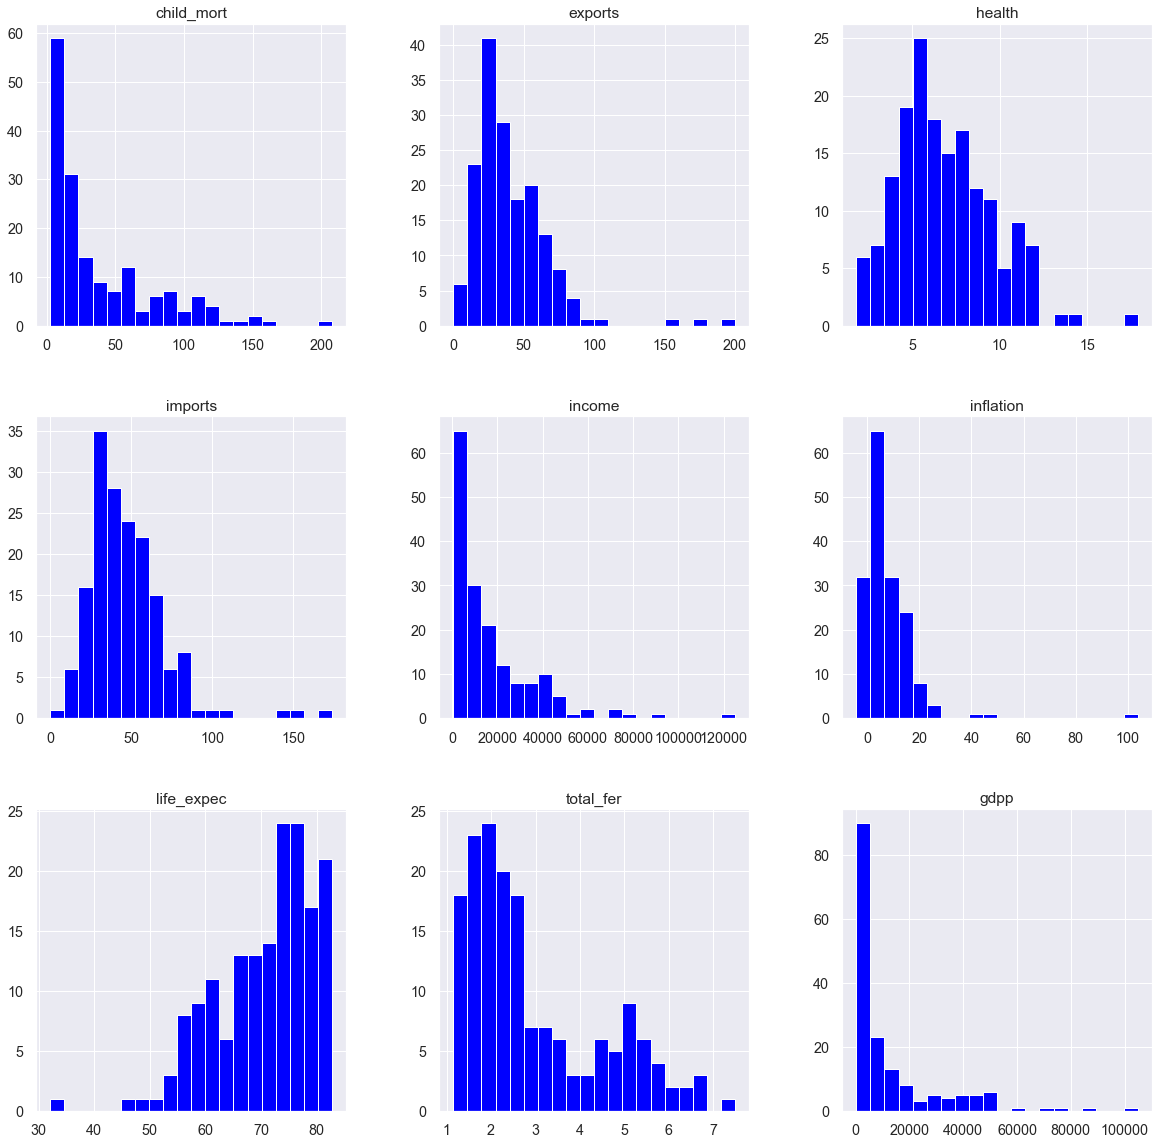

In [117]:
sns.set(font_scale=1.3,rc={"figure.figsize":(20,20)})
eixo = Countries.hist(bins=20, color="blue")

Heatmap das variáveis antes do Log e do Scale:

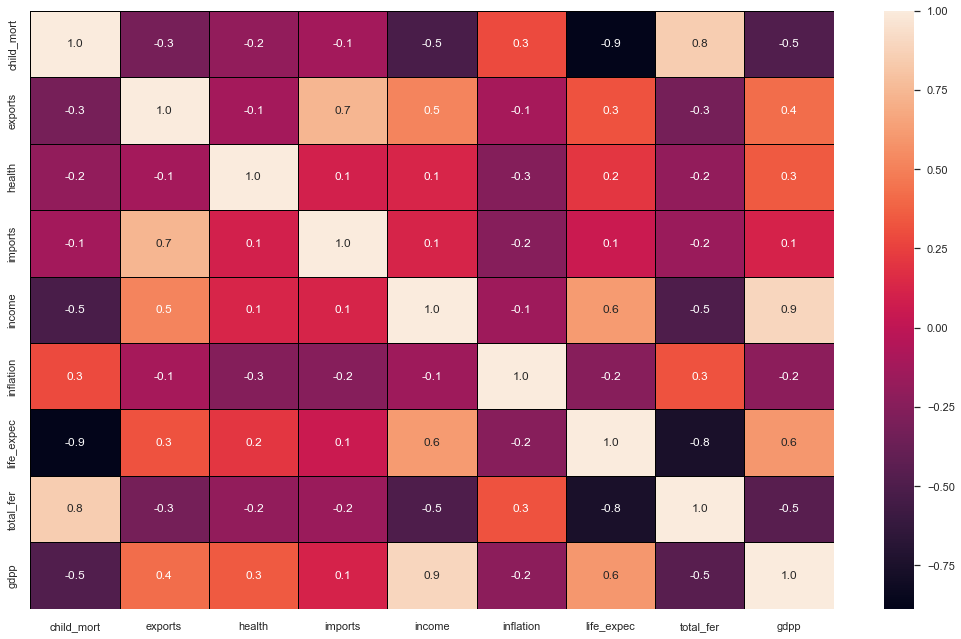

In [118]:
correlation = Countries.corr()
correlation
sns.set(rc = {'figure.figsize':(18,11)})
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1, linecolor='black')
plot;

_________________________

# Log

In [120]:
Countries.set_index('country', inplace=True) #Colocando os países como index

In [141]:
data = Countries.loc[Countries.index != "Myanmar"] #Excluindo Myanmar que é um grande outlier
data_log = data.copy()
data_log['log_income'] = np.log(data_log.income) #Criando uma coluna para o Log
data_log['log_gdpp'] = np.log(data_log.gdpp) #Criando uma coluna para o Log
data_log['log_child_mort'] = np.log(data_log.child_mort) #Criando uma coluna para o Log


In [142]:
data_log.drop(['income','gdpp','child_mort'],axis=1,inplace=True) #Deletando as colunas originais

# Gráficos depois do Log

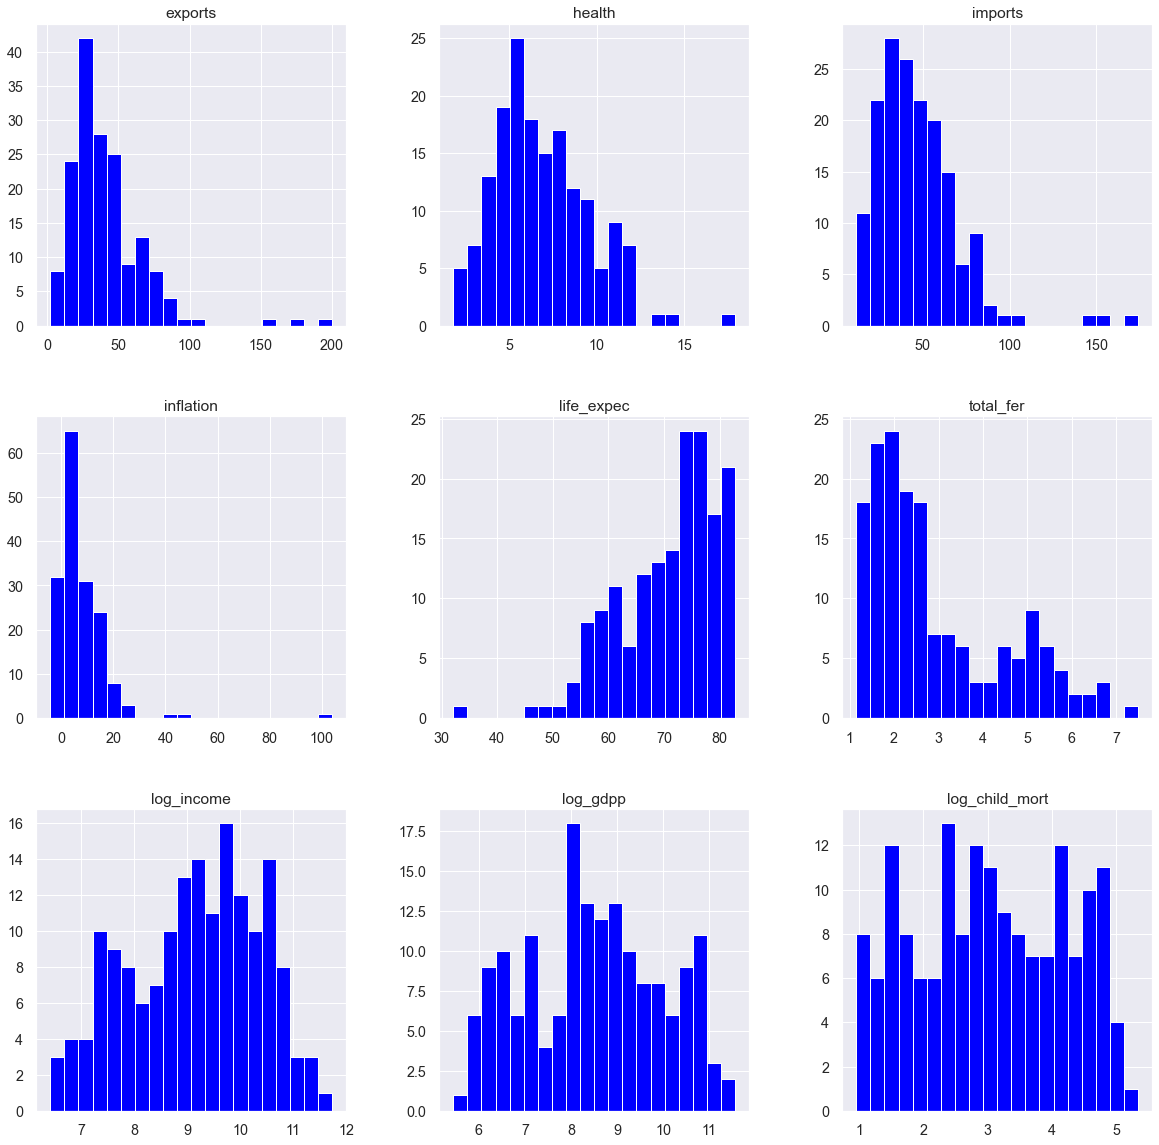

In [143]:
sns.set(font_scale=1.3,rc={"figure.figsize":(20,20)})
eixo = data_log.hist(bins=20, color="blue");

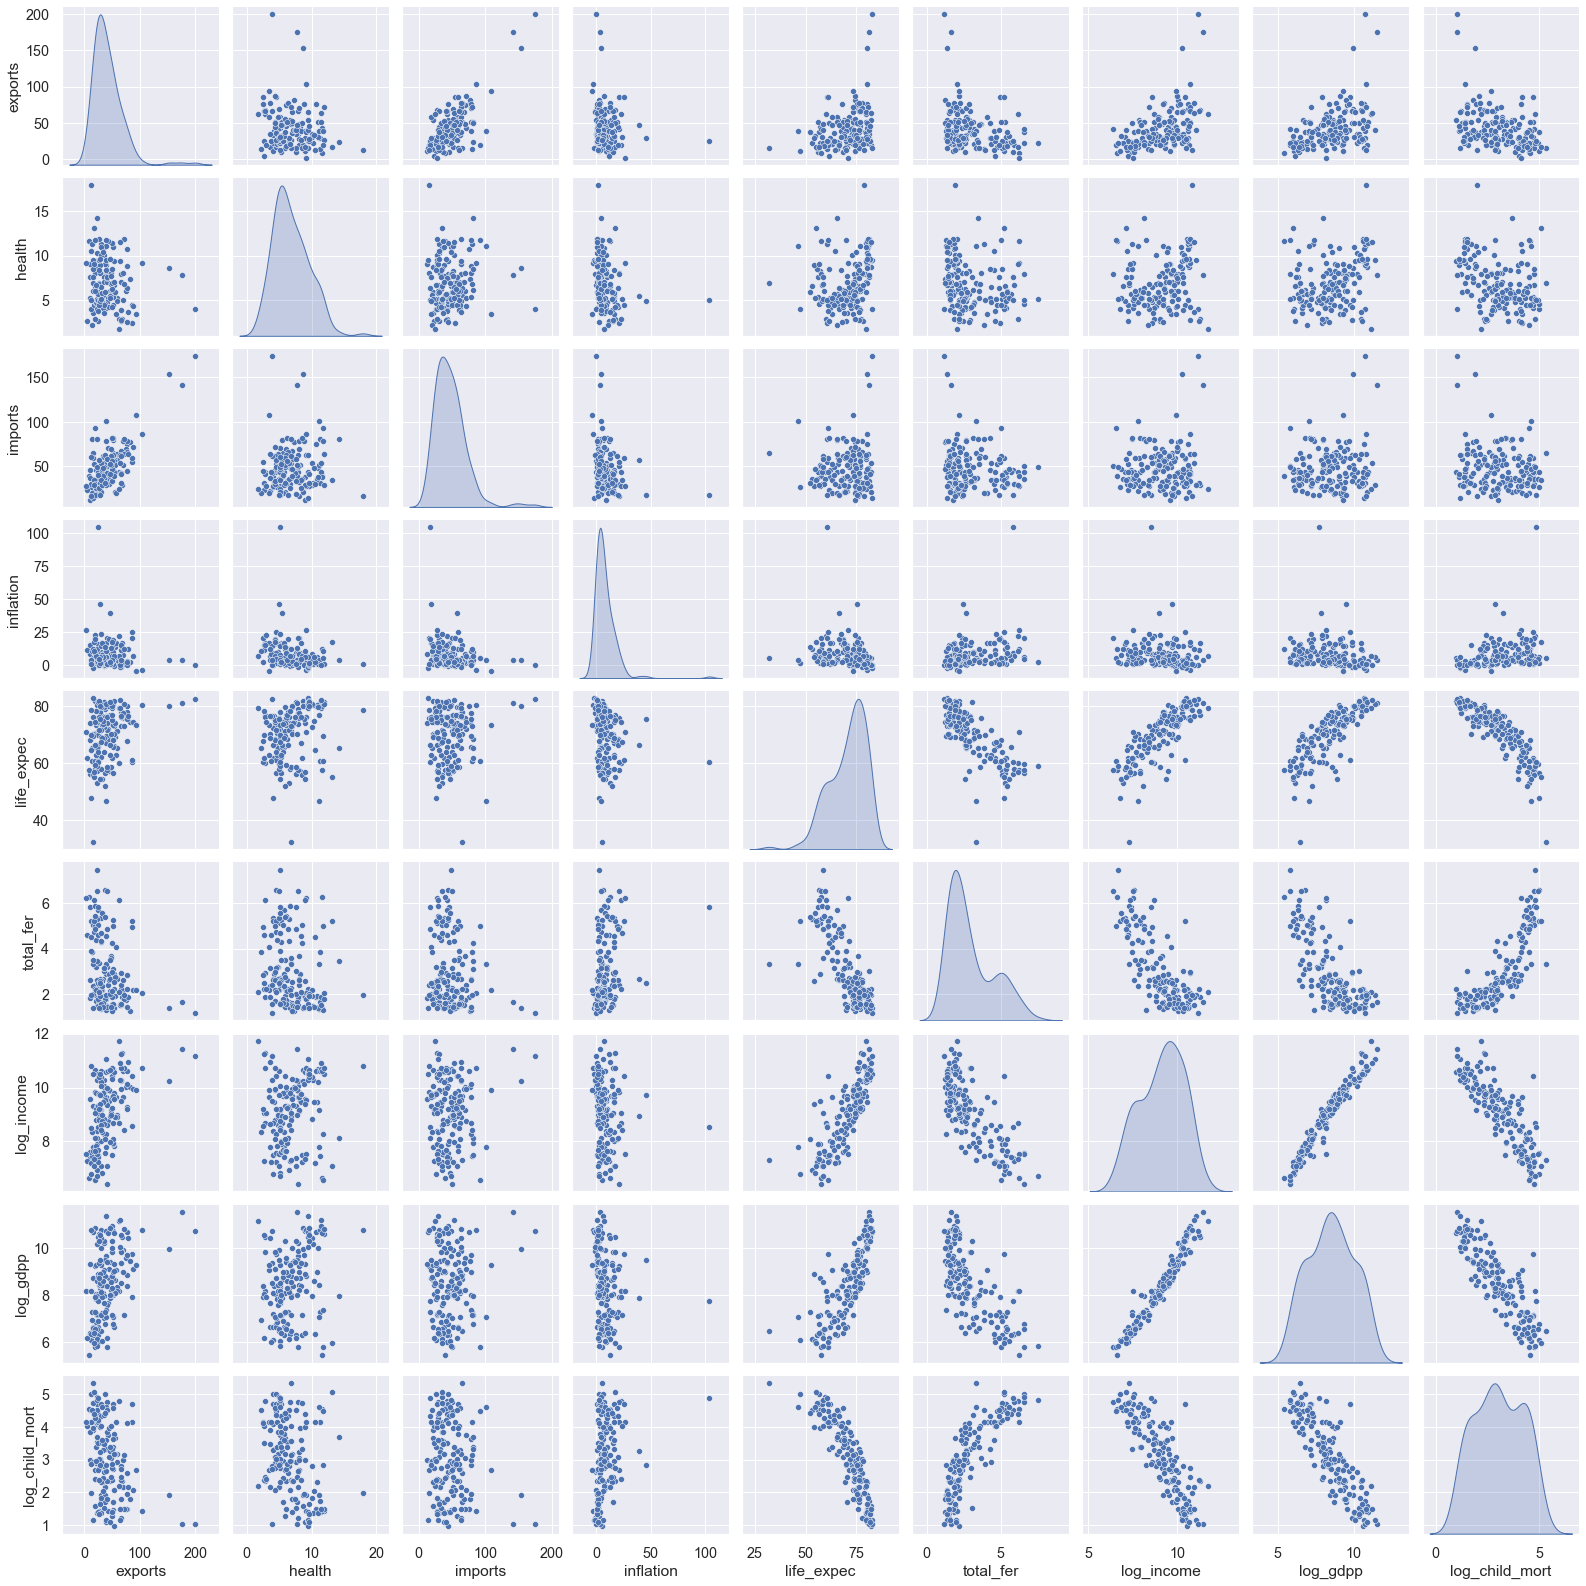

In [175]:
sns.pairplot(data_log, diag_kind="kde");

_________________

# Scaling

In [145]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(data_log),
                           columns=data_log.columns,
                           index=data_log.index) # Utilizando as o Data_Log para o scaling
scaled_data


,exports,health,imports,inflation,life_expec,total_fer,log_income,log_gdpp,log_child_mort
country,,,,,,,,,
Afghanistan,-1.151711,0.270184,-0.094941,0.156444,-1.617656,1.895761,-1.415475,-1.467716,1.262871
Albania,-0.490567,-0.108379,0.059653,-0.311838,0.643728,-0.859864,0.067260,-0.129114,-0.200340
Algeria,-0.108573,-0.983118,-0.659002,0.786497,0.666229,-0.040445,0.280516,-0.071177,0.229716
Angola,0.769279,-1.468268,-0.178506,1.382492,-1.178880,2.120441,-0.357031,-0.227620,1.502408
Antigua and Barbuda,0.152211,-0.299499,0.490011,-0.600376,0.699981,-0.542670,0.600369,0.602015,-0.612912
...,...,...,...,...,...,...,...,...,...
Vanuatu,0.192614,-0.586178,0.230960,-0.488745,-0.852611,0.362656,-0.921940,-0.343178,0.287878
Venezuela,-0.472202,-0.711141,-1.235598,3.605651,0.542472,-0.317990,0.481113,0.669752,-0.174687
Vietnam,1.125562,-0.001793,1.379973,0.408087,0.283706,-0.661618,-0.579605,-0.890766,0.092756


# Gráficos depois do Scaling

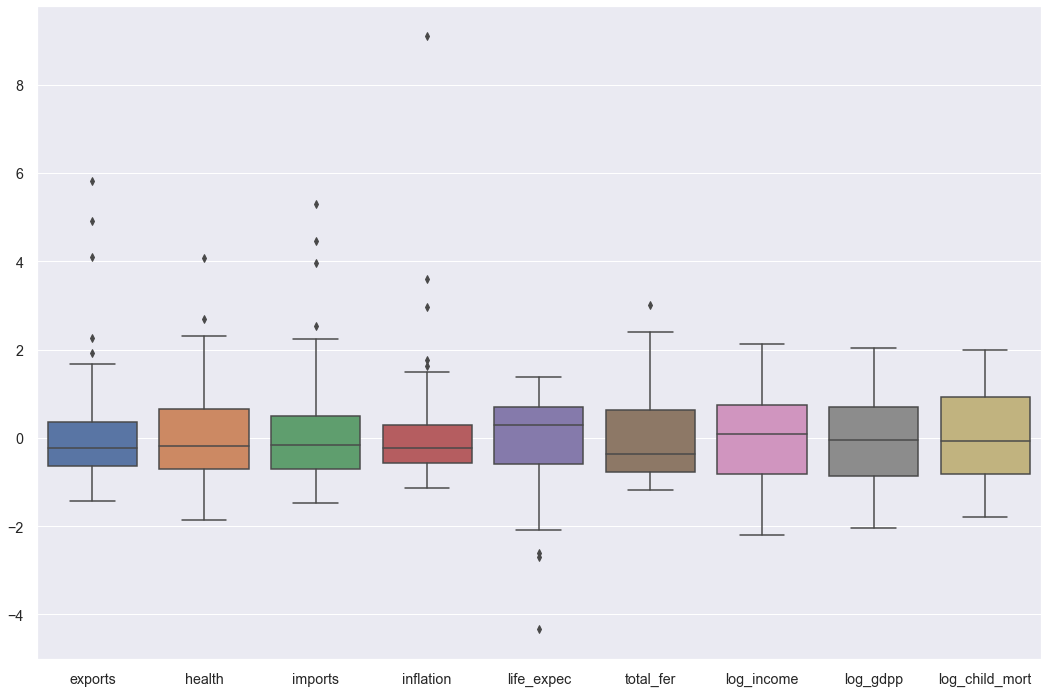

In [180]:
plt.figure(figsize=(18,12))
sns.boxplot(data=scaled_data);

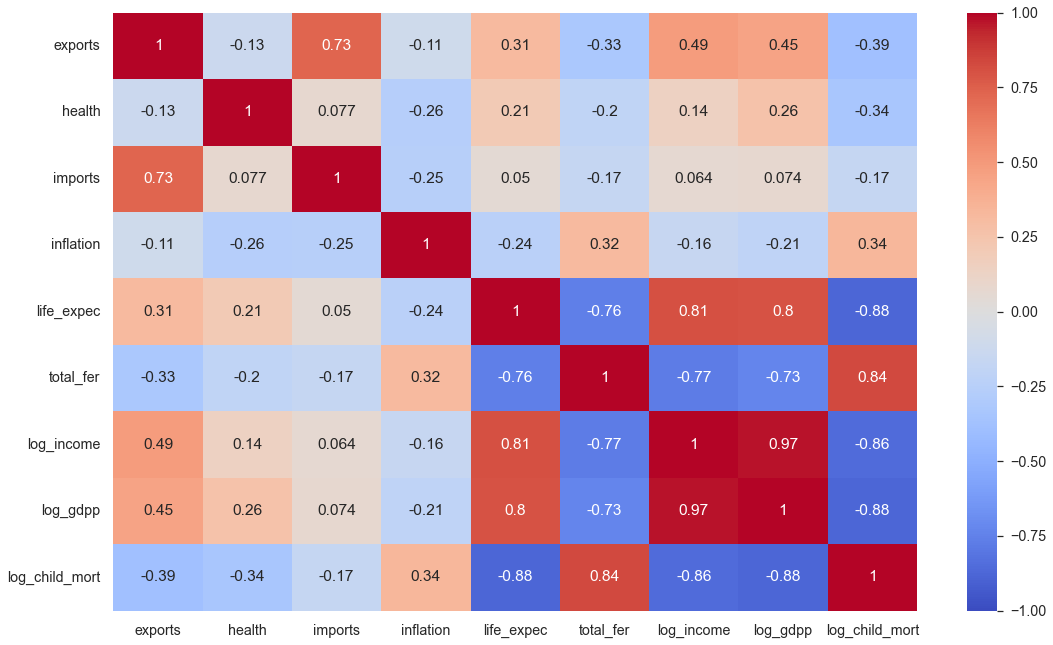

In [173]:
fig, ax  = plt.subplots(1, 1, figsize=(18, 11))
sns.heatmap(scaled_data.corr(), cmap="coolwarm", annot=True, ax=ax, vmax=1, vmin=-1);

c:\Users\DOUGL\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\DOUGL\anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


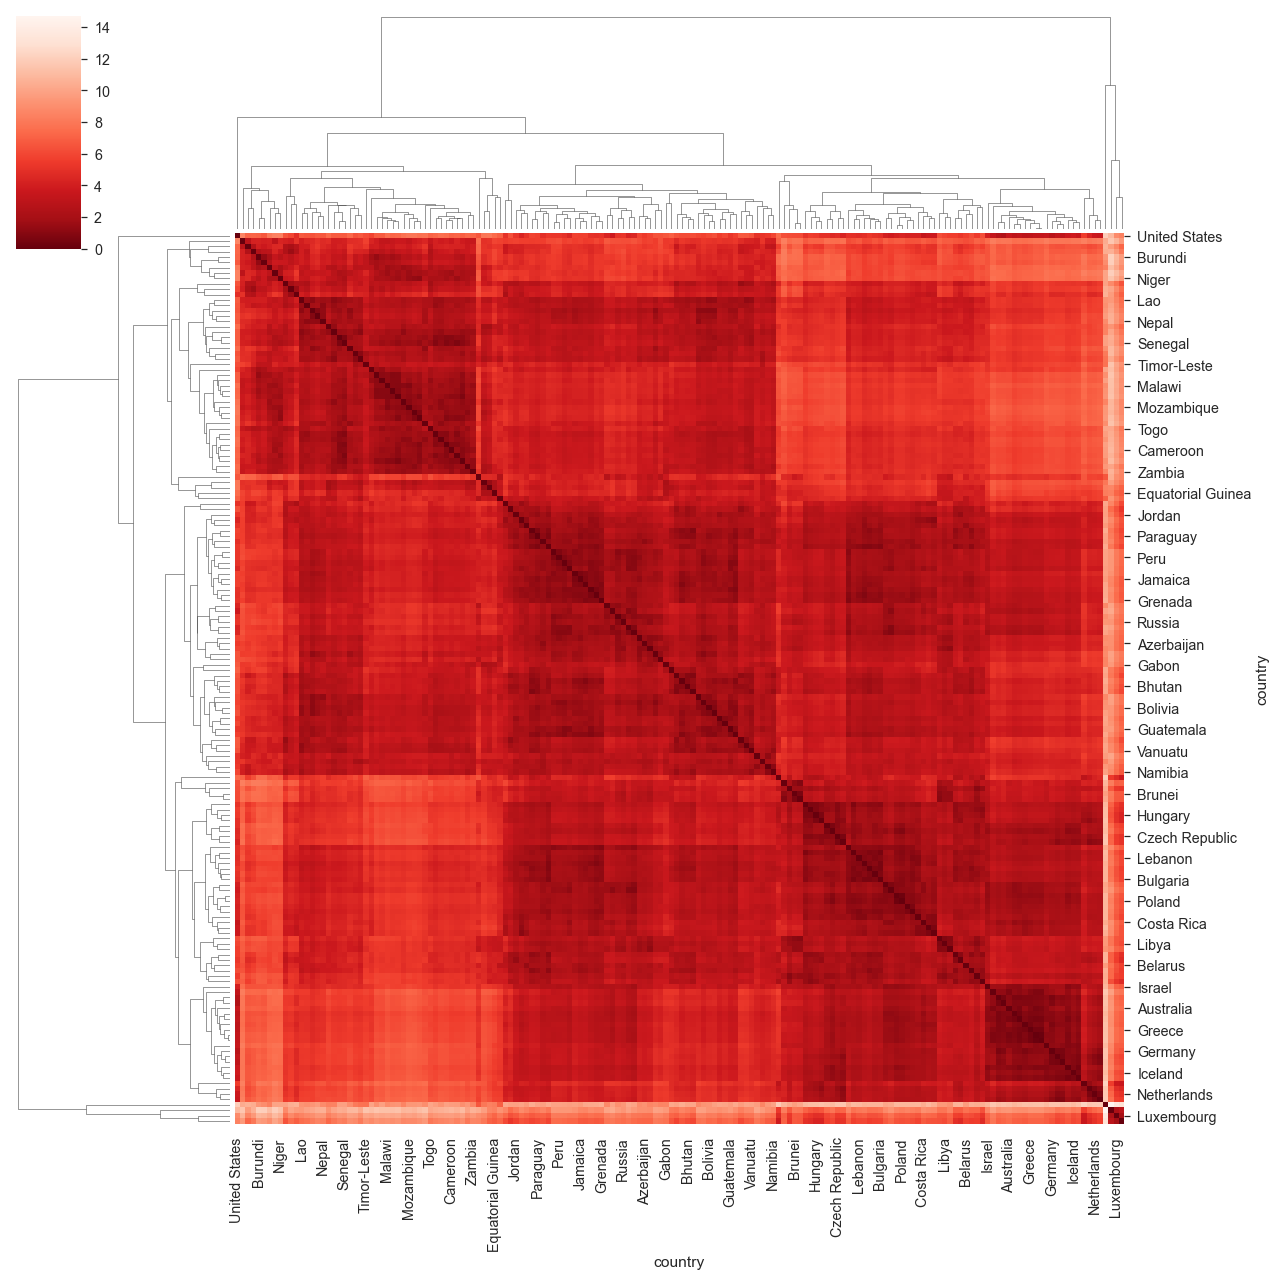

In [172]:
euclidean = DistanceMetric.get_metric('euclidean')

distances = euclidean.pairwise(scaled_data)
distances = pd.DataFrame(distances, 
                         columns=scaled_data.index,
                         index=scaled_data.index)

sns.clustermap(distances, cmap="Reds_r", figsize=(18, 18), method='average');

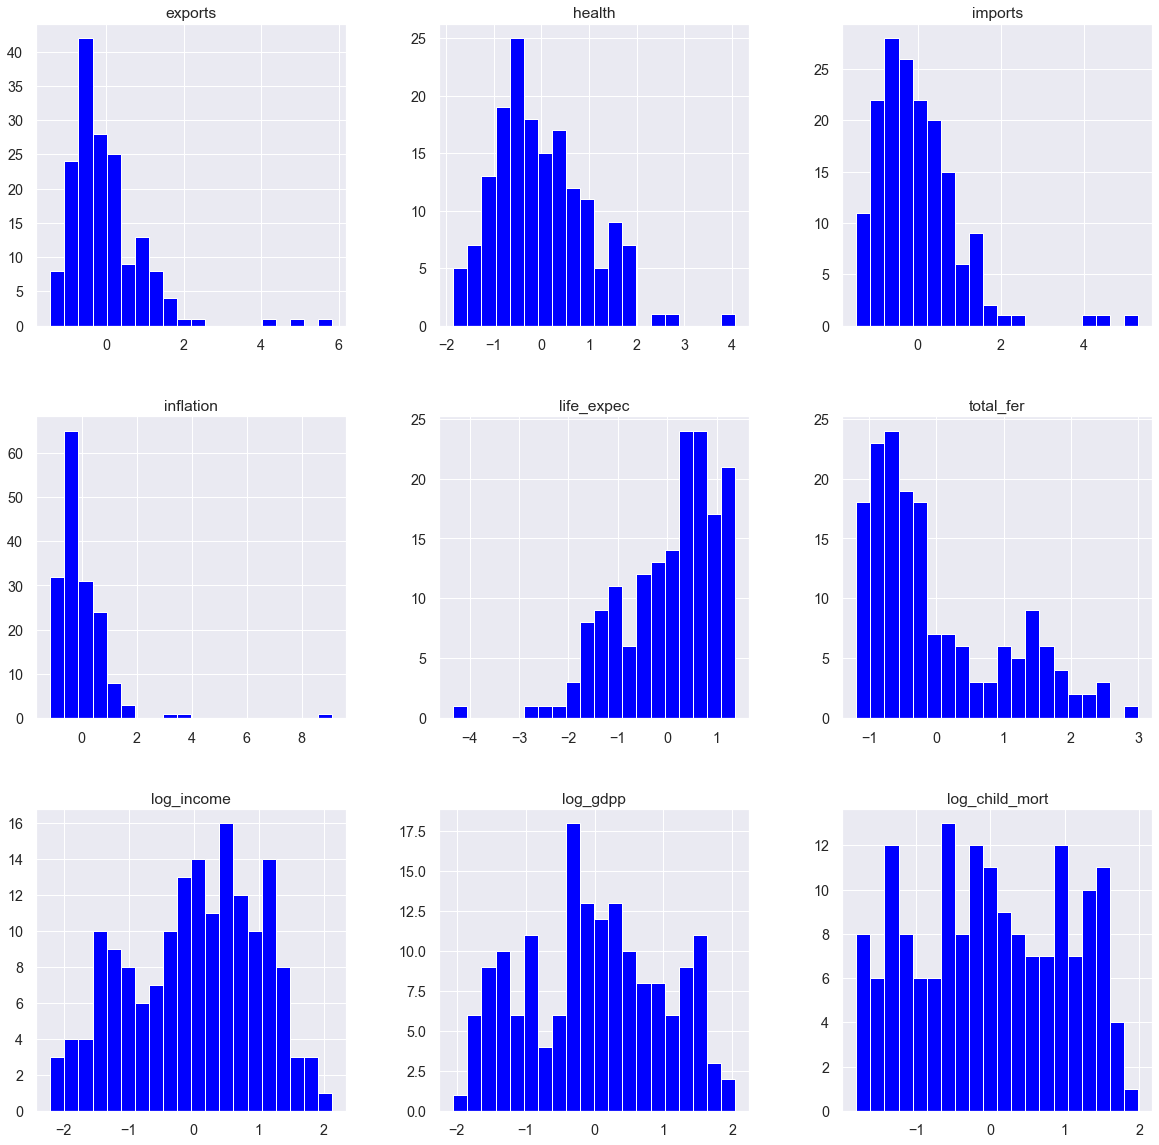

In [150]:
sns.set(font_scale=1.3,rc={"figure.figsize":(20,20)})
eixo = scaled_data.hist(bins=20, color="blue")

___________________

# K-Means

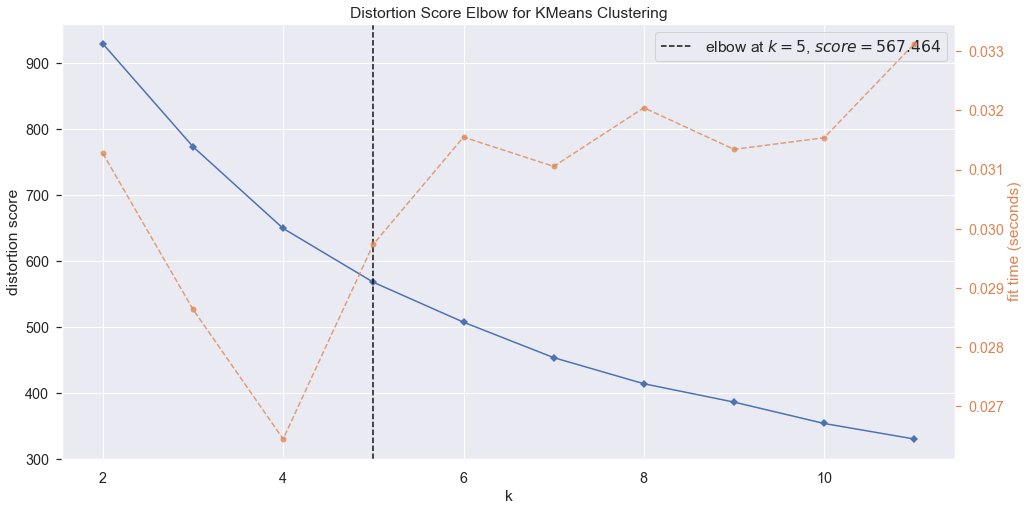

In [181]:
model = KMeans()

fig, ax =plt.subplots(1, 1, figsize=(16, 8))
visualizer = KElbowVisualizer(model, k=(2, 12), ax=ax)
visualizer.fit(scaled_data)
visualizer.show();

O grafico acima desmonstrou que 5 seria o melhor numero de clusters

In [155]:
model = KMeans(n_clusters=5)
model.fit(scaled_data)
KM5 = model.predict(scaled_data)
KM5

array([1, 0, 0, 1, 4, 0, 0, 3, 3, 0, 3, 4, 0, 3, 4, 4, 0, 1, 0, 0, 3, 0,
       3, 4, 4, 1, 1, 0, 1, 3, 0, 1, 1, 3, 0, 0, 1, 1, 1, 3, 1, 3, 4, 4,
       3, 0, 0, 0, 0, 0, 1, 4, 0, 3, 3, 0, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 4, 3, 0, 0, 0, 0, 4, 3, 3, 0, 3, 0, 0, 1, 1, 4, 0, 0, 4, 4, 1,
       1, 4, 4, 2, 0, 1, 1, 4, 4, 1, 2, 1, 4, 0, 0, 0, 3, 0, 1, 0, 0, 3,
       3, 1, 1, 3, 4, 1, 4, 0, 0, 0, 3, 3, 4, 0, 0, 1, 0, 4, 1, 3, 4, 1,
       2, 4, 3, 1, 0, 4, 3, 0, 0, 1, 0, 3, 3, 1, 1, 4, 1, 1, 0, 0, 0, 0,
       1, 0, 4, 3, 3, 3, 0, 0, 0, 0, 1, 1])

Como foi solicitado apenas 3 grupos distintos, estou determinando abaixo 3 clusters:

In [184]:
model3 = KMeans(n_clusters=3)
model3.fit(scaled_data)
KM3 = model3.predict(scaled_data)
KM3

array([2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2])

Fazendo um novo dataset com a coluna do Cluster

In [185]:
data_groups = scaled_data.copy()  
data_groups["KM3"] = KM3
data_groups

,exports,health,imports,inflation,life_expec,total_fer,log_income,log_gdpp,log_child_mort,KM3
country,,,,,,,,,,
Afghanistan,-1.151711,0.270184,-0.094941,0.156444,-1.617656,1.895761,-1.415475,-1.467716,1.262871,2
Albania,-0.490567,-0.108379,0.059653,-0.311838,0.643728,-0.859864,0.067260,-0.129114,-0.200340,0
Algeria,-0.108573,-0.983118,-0.659002,0.786497,0.666229,-0.040445,0.280516,-0.071177,0.229716,0
Angola,0.769279,-1.468268,-0.178506,1.382492,-1.178880,2.120441,-0.357031,-0.227620,1.502408,2
Antigua and Barbuda,0.152211,-0.299499,0.490011,-0.600376,0.699981,-0.542670,0.600369,0.602015,-0.612912,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0.192614,-0.586178,0.230960,-0.488745,-0.852611,0.362656,-0.921940,-0.343178,0.287878,0
Venezuela,-0.472202,-0.711141,-1.235598,3.605651,0.542472,-0.317990,0.481113,0.669752,-0.174687,0
Vietnam,1.125562,-0.001793,1.379973,0.408087,0.283706,-0.661618,-0.579605,-0.890766,0.092756,0


In [199]:
data["Cluster"] = KM3
data

C:\Users\DOUGL\AppData\Local\Temp\ipykernel_17956\81537179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster"] = KM3


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0


In [186]:
vars = scaled_data.columns
vars

Index(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer',
       'log_income', 'log_gdpp', 'log_child_mort'],
      dtype='object')

In [188]:
colors = ['black', 'blue', 'red']
dict_colors = dict(zip(set(KM3),colors))
dict_colors #Definindo as cores do Pairplot

{0: 'black', 1: 'blue', 2: 'red'}

Distribuição das dimensões em cada grupo

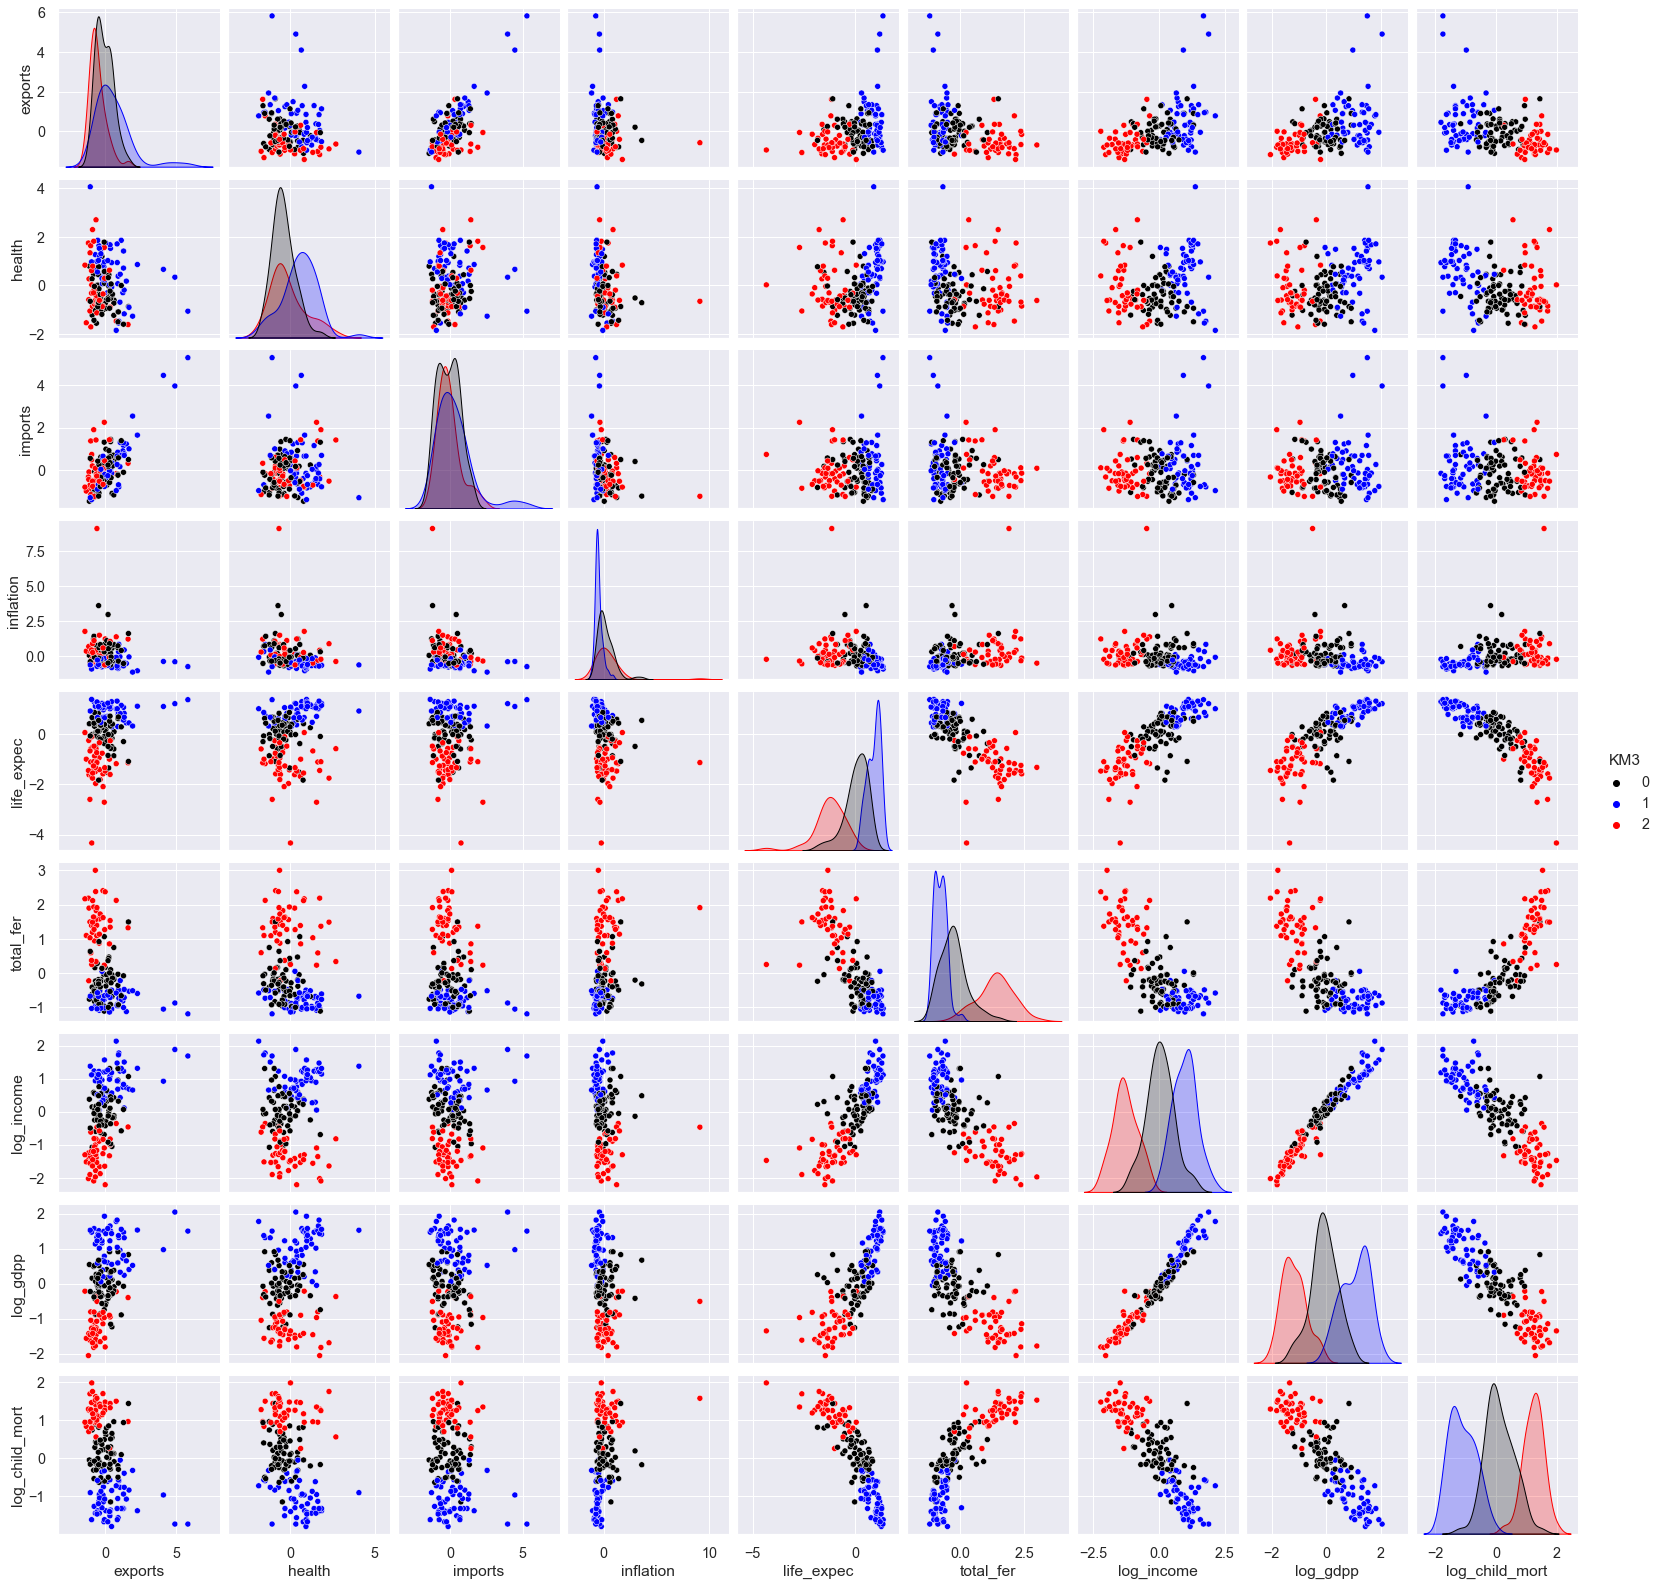

In [190]:
sns.pairplot(data=data_groups, x_vars=vars, y_vars=vars, hue='KM3', palette=dict_colors);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


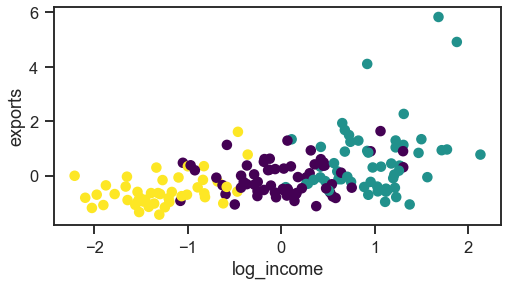

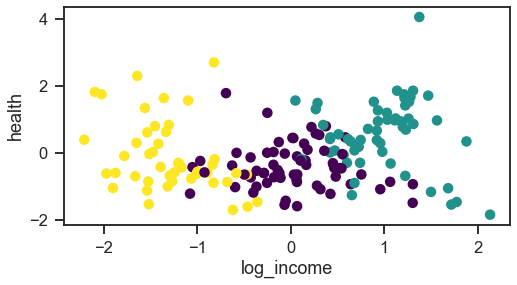

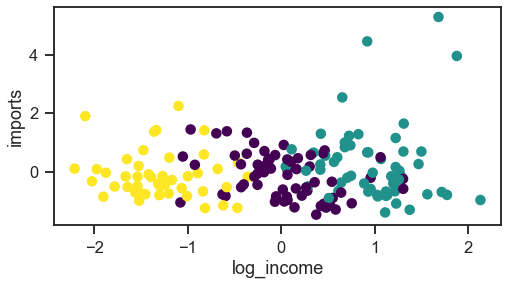

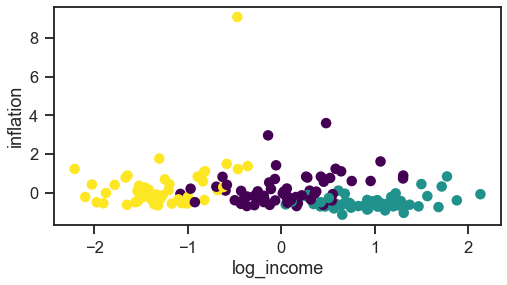

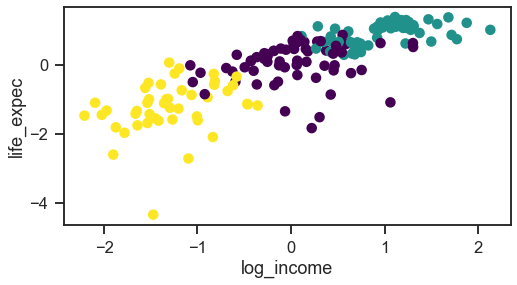

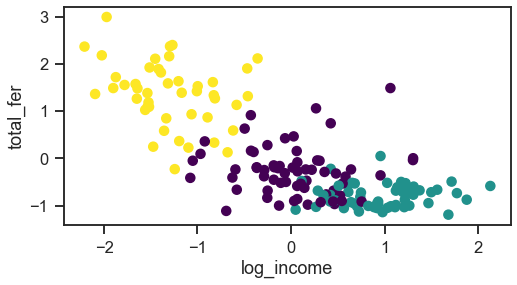

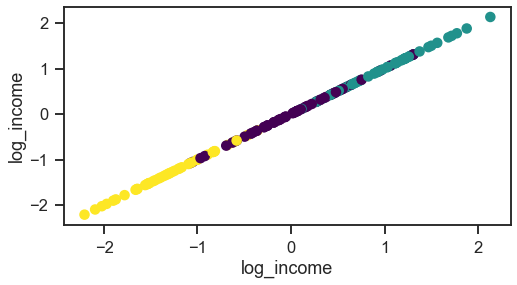

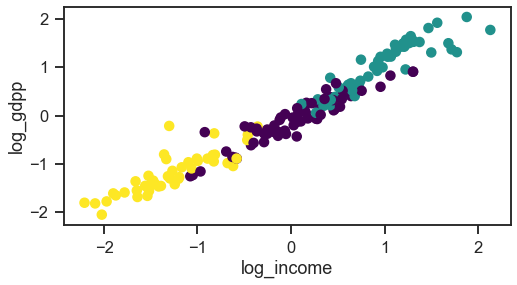

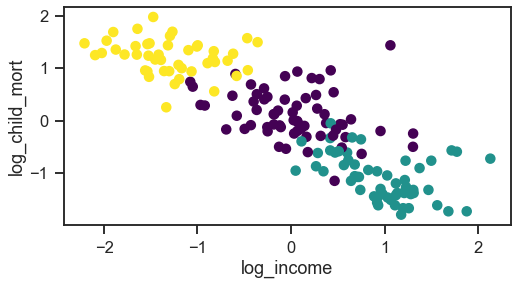

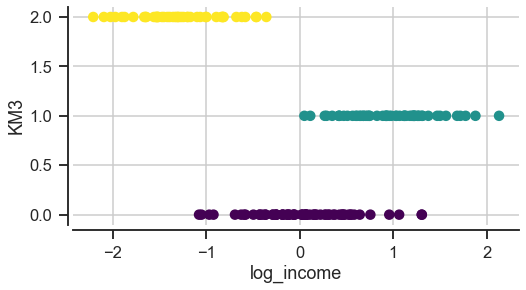

In [213]:
for coluna in data_groups.columns:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.scatter(data_groups["log_income"],
    data_groups[coluna],
    c=KM3, cmap='viridis')
    ax.set_xlabel("log_income")
    ax.set_ylabel(coluna)        

ax.grid(True)
ax.legend()
sns.despine(offset=5)

# PCA

In [223]:
pca = PCA(n_components=4)
data_pca = pca.fit_transform(scaled_data)

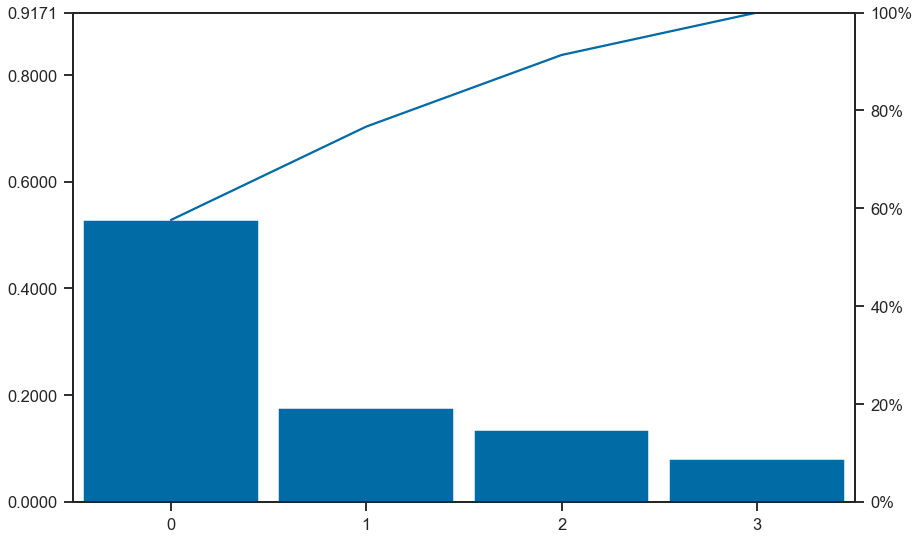

In [282]:
fig = plt.subplots(figsize=(14, 9))
pareto(pca.explained_variance_ratio_);

O país, de acordo com o algoritmo, melhor representa o seu 
agrupamento. Justifique

In [225]:
data_pca = pd.DataFrame(data_pca, columns=[f'V{i+1}' for i in range(data_pca.shape[1])])
data_pca

,V1,V2,V3,V4
0,-3.479321,-0.038641,-0.889653,0.331807
1,0.589723,-0.389572,-0.190556,-0.522435
2,-0.093102,-0.499707,1.390655,-0.302851
3,-2.492571,1.094862,1.876176,0.393190
4,1.436962,0.233096,-0.011984,-0.546935
...,...,...,...,...
161,-1.080338,0.767167,-0.264854,-0.611322
162,-0.039848,-1.602196,3.185443,1.712591
163,0.084146,1.688342,-0.050080,0.425922
164,-2.092555,-0.271749,1.142787,0.551740


K-Means depois do PCA

In [256]:
model = KMeans(n_clusters=3)
model.fit(data_pca)
clusters_pca = model.predict(data_pca)
data['cluster_pca'] = clusters_pca
data

C:\Users\DOUGL\AppData\Local\Temp\ipykernel_17956\700297403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_pca'] = clusters_pca


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_pca
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1


In [230]:
(data['Cluster'] != data['cluster_pca']).sum()

165

In [232]:
centers = pd.DataFrame(model.cluster_centers_, columns=[f'V{i+1}' for i in range(data_pca.shape[1])])
centers

,V1,V2,V3,V4
0,2.347793,-0.030971,-0.225810,0.094643
1,-2.872342,0.219462,-0.285625,0.208240
2,-0.071387,-0.126726,0.401942,-0.230710


In [233]:
data_pca['cluster'] = clusters_pca
data_pca

,V1,V2,V3,V4,cluster
0,-3.479321,-0.038641,-0.889653,0.331807,1
1,0.589723,-0.389572,-0.190556,-0.522435,2
2,-0.093102,-0.499707,1.390655,-0.302851,2
3,-2.492571,1.094862,1.876176,0.393190,1
4,1.436962,0.233096,-0.011984,-0.546935,0
...,...,...,...,...,...
161,-1.080338,0.767167,-0.264854,-0.611322,2
162,-0.039848,-1.602196,3.185443,1.712591,2
163,0.084146,1.688342,-0.050080,0.425922,2
164,-2.092555,-0.271749,1.142787,0.551740,1


## Cluster 1

In [235]:
cluster_0 = data_pca[data_pca['cluster']==0]
cluster_0

,V1,V2,V3,V4,cluster
4,1.436962,0.233096,-0.011984,-0.546935,0
7,2.416354,-2.015559,-0.210706,-0.239816,0
8,3.039466,-0.688829,-0.815826,0.594219,0
10,1.511081,-0.594138,-0.413054,-0.317763,0
11,1.907404,0.479542,1.027060,-0.306451,0
13,1.412163,-0.343760,-0.500526,-0.275498,0
15,3.185272,0.733150,-0.770460,0.943336,0
20,1.364832,-0.716871,-1.501698,0.394300,0
23,1.968883,-0.264314,2.486455,-0.400903,0
24,1.251373,0.184577,-0.265055,-0.471059,0


In [236]:
cluster_0['dist_2'] = (cluster_0['V1']-centers.loc[0]['V1'])**2 + \
    (cluster_0['V2']-centers.loc[0]['V2'])**2 + \
    (cluster_0['V3']-centers.loc[0]['V3'])**2 + \
    (cluster_0['V4']-centers.loc[0]['V4'])**2

C:\Users\DOUGL\AppData\Local\Temp\ipykernel_17956\2574148419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['dist_2'] = (cluster_0['V1']-centers.loc[0]['V1'])**2 + \


In [237]:
index_min = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index

### País que melhor representa o agrupamento 1

In [238]:
data.iloc[index_min,:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_pca
country,,,,,,,,,,,
Czech Republic,3.4,66.0,7.88,62.9,28300,-1.43,77.5,1.51,19800,1,0


## Cluster 2

In [239]:
cluster_1 = data_pca[data_pca['cluster']==1]
cluster_1

,V1,V2,V3,V4,cluster
0,-3.479321,-0.038641,-0.889653,0.331807,1
3,-2.492571,1.094862,1.876176,0.393190,1
17,-3.002122,0.263775,-0.288948,-1.140286,1
25,-3.534848,-0.193896,-0.633733,-0.132223,1
26,-3.932302,-0.468246,-1.839680,1.403602,1
28,-2.873569,-0.165530,-0.315077,-0.849710,1
31,-4.313079,0.039507,-0.489782,-1.193674,1
32,-3.530383,0.829779,-0.040039,-0.393599,1
36,-2.670651,0.358594,-0.408821,-0.866482,1
37,-4.044790,0.812299,-0.313644,1.320306,1


In [240]:
cluster_1['dist_2'] = (cluster_1['V1']-centers.loc[0]['V1'])**2 + \
    (cluster_1['V2']-centers.loc[0]['V2'])**2 + \
    (cluster_1['V3']-centers.loc[0]['V3'])**2 + \
    (cluster_1['V4']-centers.loc[0]['V4'])**2

C:\Users\DOUGL\AppData\Local\Temp\ipykernel_17956\180659353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['dist_2'] = (cluster_1['V1']-centers.loc[0]['V1'])**2 + \


In [241]:
index_min_cluster1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index

### País que melhor representa o agrupamento 2

In [243]:
data.iloc[index_min_cluster1,:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_pca
country,,,,,,,,,,,
Lao,78.9,35.4,4.47,49.3,3980,9.2,63.8,3.15,1140,2,1


## Cluster 3

In [263]:
cluster_2 = data_pca[data_pca['cluster']==2]
cluster_2

,V1,V2,V3,V4,cluster
1,0.589723,-0.389572,-0.190556,-0.522435,2
2,-0.093102,-0.499707,1.390655,-0.302851,2
5,0.487936,-1.910370,0.856230,0.791607,2
6,-0.034836,-0.399262,0.380281,-0.892067,2
9,0.049351,-0.492596,1.060592,-0.070120,2
...,...,...,...,...,...
159,1.096321,-1.395339,-0.212445,-0.102593,2
160,-1.128944,-0.576182,0.621164,-0.039533,2
161,-1.080338,0.767167,-0.264854,-0.611322,2
162,-0.039848,-1.602196,3.185443,1.712591,2


In [245]:
cluster_2['dist_2'] = (cluster_2['V1']-centers.loc[0]['V1'])**2 + \
    (cluster_2['V2']-centers.loc[0]['V2'])**2 + \
    (cluster_2['V3']-centers.loc[0]['V3'])**2 + \
    (cluster_2['V4']-centers.loc[0]['V4'])**2

C:\Users\DOUGL\AppData\Local\Temp\ipykernel_17956\2546805101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2['dist_2'] = (cluster_2['V1']-centers.loc[0]['V1'])**2 + \


In [246]:
index_min_cluster2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

### País que melhor representa o agrupamento 3

In [261]:
data.iloc[index_min_cluster2,:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_pca
country,,,,,,,,,,,
"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.04,74.0,1.47,4540,0,1


______________________

# Clusterização Hierárquica

In [167]:
from sklearn.cluster import AgglomerativeClustering

In [169]:
X = scaled_data[["log_income","log_gdpp"]]
X

,log_income,log_gdpp
country,,
Afghanistan,-1.415475,-1.467716
Albania,0.067260,-0.129114
Algeria,0.280516,-0.071177
Angola,-0.357031,-0.227620
Antigua and Barbuda,0.600369,0.602015
...,...,...
Vanuatu,-0.921940,-0.343178
Venezuela,0.481113,0.669752
Vietnam,-0.579605,-0.890766


In [170]:
hc = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(X)

In [171]:
y_hc

array([1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [129]:
teste = X
teste['y_hc'] = y_hc
x_0 = teste[teste['y_hc'] == 0]
x_1 = teste[teste['y_hc'] == 1]
x_2 = teste[teste['y_hc'] == 2]

C:\Users\DOUGL\AppData\Local\Temp\ipykernel_17956\127671511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['y_hc'] = y_hc


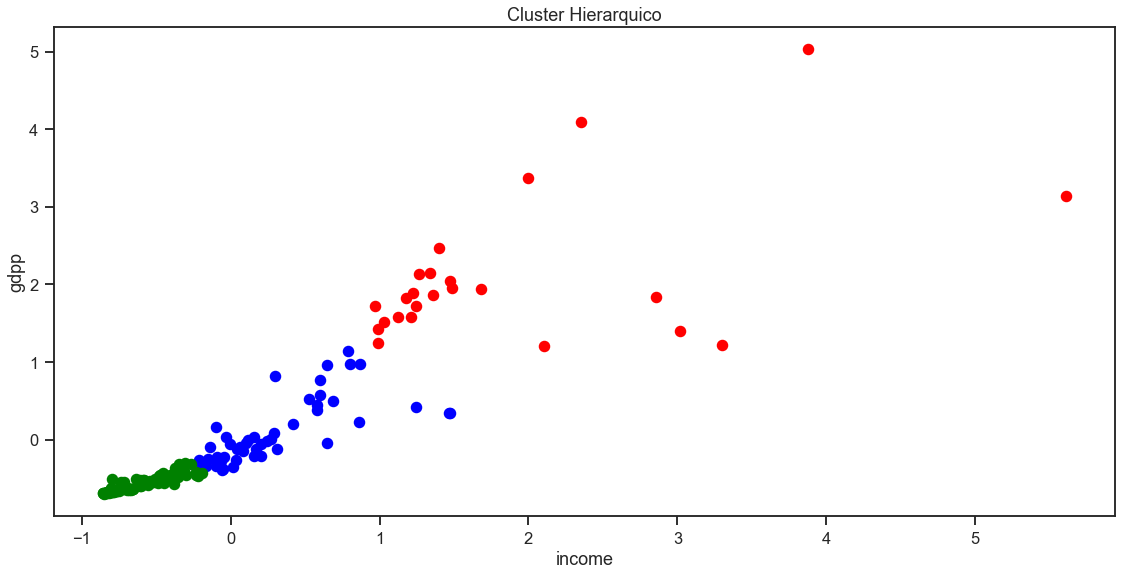

In [277]:
fig = plt.subplots(figsize=(19, 9))
plt.scatter(x_0['income'], x_0['gdpp'],s=100,c="red",label="Cluster1")
plt.scatter(x_1['income'], x_1['gdpp'],s=100,c="blue",label="Cluster2")
plt.scatter(x_2['income'], x_2['gdpp'],s=100,c="green",label="Cluster3")
plt.title("Cluster Hierarquico")
plt.xlabel("income")
plt.ylabel("gdpp")
plt.show()

## Dendrograma

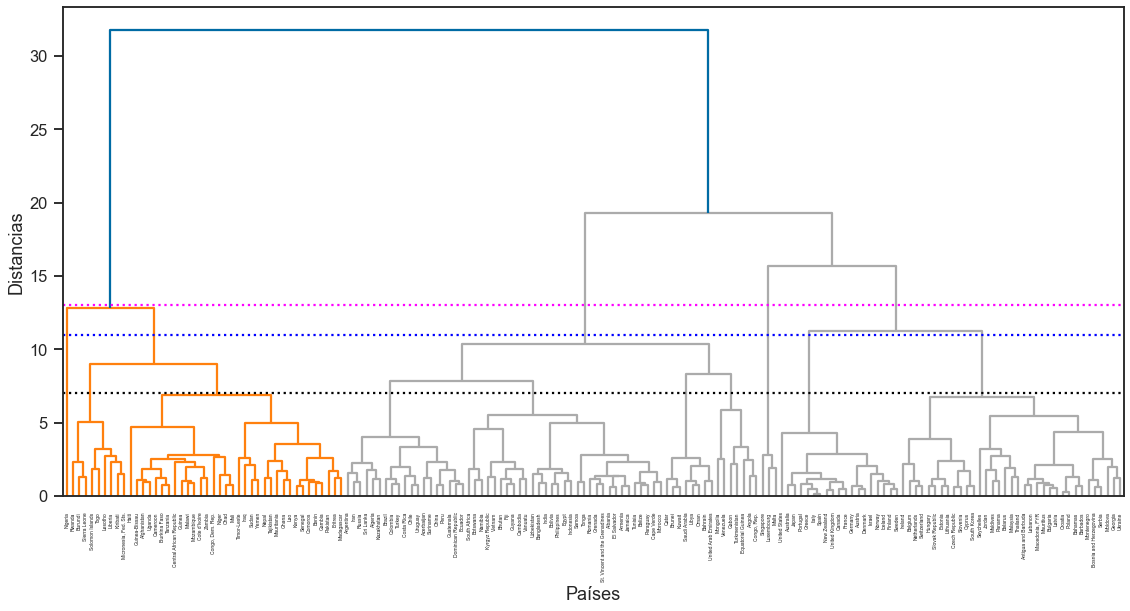

In [271]:
distance_threshold = 13
distance_threshold1 = 7
distance_threshold2 = 11


plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(19, 9))

linkage = sch.linkage(scaled_data, method="ward")
dendrogram = sch.dendrogram(linkage, labels=scaled_data.index, leaf_rotation=90)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')
ax.axhline(distance_threshold, color='magenta', ls=":")
ax.axhline(distance_threshold1, color='black', ls=":")
ax.axhline(distance_threshold2, color='blue', ls=":")


A representação em dendrograma da clusterização hierárquica fornece insights sobre a estrutura dos agrupamentos e suas relações. Observamos uma divisão em duas etapas distintas. Na primeira dessas etapas, identificamos um agrupamento caracterizado pela cor preta (distância de 7), cujo limite de similaridade é ligeiramente inferior a 13. Este agrupamento engloba os países com os piores índices socioeconômicos, apresentando elevados níveis de pobreza. Por outro lado, os países com índices medianos e bons compartilham algumas características em comum. Aproximadamente no limite de similaridade 11 (azul), observamos a presença de dois agrupamentos muito semelhantes, diferenciando-se apenas em um segundo nível de ramificação na árvore hierárquica.

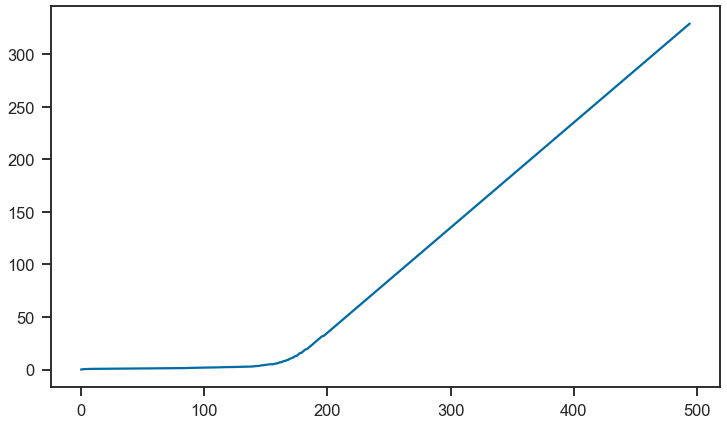

In [275]:
fig = plt.subplots(figsize=(12, 7))
plt.plot(np.unique(linkage));

_____________________________

# 4) Compare os resultados

Após aplicar a PCA para reduzir a dimensionalidade, o K-means se tornou mais eficiente na separação das variáveis. A visualização das componentes da PCA facilita a compreensão e obtenção de informações sobre a classificação. No entanto, a Clusterização Hierárquica é mais restritiva, pois cria ramificações que podem resultar em clusters diferentes, mesmo com distâncias iguais. A Clusterização Hierárquica oferece uma visão da estrutura e relações dos dados, permitindo uma clusterização mais eficiente com o K-means. Em resumo, a abordagem hierárquica é um passo para compreender os dados, enquanto o K-means é usado para classificá-los efetivamente.

_____________________________

# Escolha do Agoritmo

### 1) Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência

1. **Inicialização:** Escolher aleatoriamente K pontos iniciais como centroides dos clusters.

2. **Atribuição:** Calcular a distância entre cada ponto de dados e os centroides. Atribuir cada ponto ao cluster cujo centróide é o mais próximo.

3. **Atualização:** Recalcular os centroides dos clusters, considerando a média dos pontos atribuídos a cada cluster.

4. **Verificação de convergência:** Verificar se houve alterações na atribuição dos pontos aos clusters. Se não houver alterações, o algoritmo convergiu e podemos finalizá-lo. Caso contrário, retornar à etapa de atribuição.

5. Repetir as etapas 2 a 4 até que ocorra a convergência.

6. O critério de convergência é geralmente baseado em uma condição de parada, como um número máximo de iterações ou quando a mudança na atribuição dos pontos aos clusters é pequena o suficiente.

- É importante ressaltar que a inicialização dos centroides pode afetar os resultados finais, e diferentes estratégias podem ser adotadas, como a inicialização aleatória ou a utilização de técnicas mais avançadas, como o K-means++.

- O algoritmo de K-médias é repetido até que ocorra a convergência e os centroides finais representem os centróides otimizados para cada cluster, permitindo assim realizar a análise de agrupamento dos dados.

_________________________

### 2)  Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as terações do algoritmo.

Não consigo fazer essa etapa e não encontrei material suficiente.

________________________

### 3) O algoritmo de K-médias é sensível a outliers nos dados. Explique.

A presença de outliers pode afetar negativamente o desempenho do algoritmo de K-médias de várias maneiras:

- **Influência na média:** O K-Means calcula os centroides dos clusters como a média dos pontos atribuídos a cada cluster. Se um outlier estiver presente em um cluster, sua posição distante pode distorcer significativamente a média do cluster, puxando o centróide para longe do centro real do agrupamento.

- **Atribuição incorreta:** Como o K-Means atribui cada ponto ao cluster com o centróide mais próximo, a presença de outliers pode levar à atribuição incorreta de pontos normais próximos ao outlier. Isso ocorre porque o centróide distante do outlier pode se tornar o centróide mais próximo para pontos que deveriam estar em um cluster diferente.

- **Desbalanceamento dos clusters:** A presença de outliers pode resultar em clusters desbalanceados. Por exemplo, se um outlier estiver presente em um cluster pequeno, ele pode fazer com que o cluster pareça muito maior do que realmente é, enquanto os outros clusters podem se tornar muito menores.


________________________

### 4) Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O algoritmo DBSCAN é mais robusto à presença de outliers porque se baseia na densidade dos pontos, identificando regiões densas como clusters e pontos isolados como outliers. Ele é tolerante à distância, permitindo especificar um limite de distância que define a vizinhança dos pontos. Além disso, o DBSCAN é flexível em relação à forma dos clusters, sendo capaz de identificar agrupamentos de diferentes formas e tamanhos. Essas características tornam o DBSCAN mais adequado para lidar com outliers e estruturas de agrupamento complexas.